In [ ]:
# Data loading

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import seaborn as sns

In [35]:
warnings.filterwarnings("ignore")
# Cleaning columns
df.columns = df.columns.str.strip()

In [7]:

# Use the raw URL to the CSV file
url = "https://raw.githubusercontent.com/akshaytoni99/My-dataset/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
# Basic info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.shape

(7043, 21)

In [10]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
# Checking null values

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [14]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
# handling Null values

In [17]:
def replace_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound

In [20]:
import numpy as np

# Define the outlier replacement function using IQR
def replace_outlier(col):
    Q1, Q3 = np.percentile(col.dropna(), [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Apply only to numeric columns
numeric_cols = df.select_dtypes(include='number').columns

for i in numeric_cols:
    lower_bound, upper_bound = replace_outlier(df[i])
    df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
    df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])


In [ ]:
# checking correlation

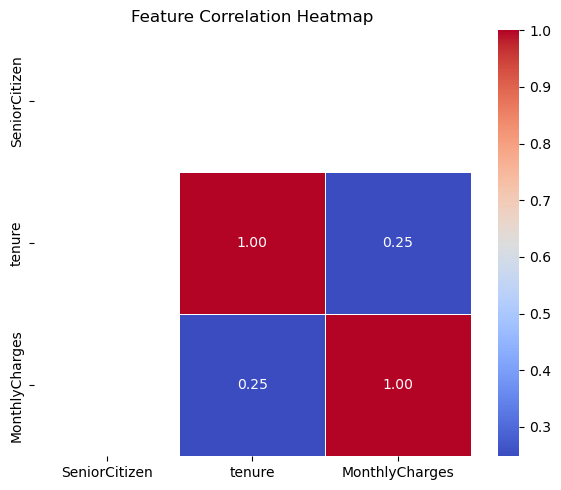

In [23]:
# 1. Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# 2. Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import chi2_contingency

cat_cols = df.select_dtypes(include='object').columns.drop(['customerID', 'Churn'])

for col in cat_cols:
    contingency = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col} → p-value: {p:.4f}")
    if p < 0.05:
        print(" → Significant relationship with Churn ✅\n")
    else:
        print(" → Not significant ❌\n")


gender → p-value: 0.4866
 → Not significant ❌

Partner → p-value: 0.0000
 → Significant relationship with Churn ✅

Dependents → p-value: 0.0000
 → Significant relationship with Churn ✅

PhoneService → p-value: 0.3388
 → Not significant ❌

MultipleLines → p-value: 0.0035
 → Significant relationship with Churn ✅

InternetService → p-value: 0.0000
 → Significant relationship with Churn ✅

OnlineSecurity → p-value: 0.0000
 → Significant relationship with Churn ✅

OnlineBackup → p-value: 0.0000
 → Significant relationship with Churn ✅

DeviceProtection → p-value: 0.0000
 → Significant relationship with Churn ✅

TechSupport → p-value: 0.0000
 → Significant relationship with Churn ✅

StreamingTV → p-value: 0.0000
 → Significant relationship with Churn ✅

StreamingMovies → p-value: 0.0000
 → Significant relationship with Churn ✅

Contract → p-value: 0.0000
 → Significant relationship with Churn ✅

PaperlessBilling → p-value: 0.0000
 → Significant relationship with Churn ✅

PaymentMethod → p-va

In [25]:
from scipy.stats import ttest_ind

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Split by Churn
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

for col in num_cols:
    stat, p = ttest_ind(churn_yes[col], churn_no[col])
    print(f"{col} → p-value: {p:.4f}")
    if p < 0.05:
        print(" → Significant difference in mean ✅\n")
    else:
        print(" → Not significant ❌\n")


tenure → p-value: 0.0000
 → Significant difference in mean ✅

MonthlyCharges → p-value: 0.0000
 → Significant difference in mean ✅

TotalCharges → p-value: 0.0000
 → Significant difference in mean ✅



In [27]:
df.drop(['gender', 'PhoneService', 'TotalCharges', 'SeniorCitizen', 'customerID'], axis=1, inplace=True)


In [28]:
df.head()

,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Yes,No,1.0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,No,No,34.0,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,No,No,2.0,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,No,No,45.0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,No,No,2.0,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [29]:
df.select_dtypes(include='object')

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [30]:
df.select_dtypes(include='object').columns


Index(['Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')

In [32]:
 df=pd.get_dummies(data=df, columns=['Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],drop_first=True)


In [37]:
df.head()

,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1.0,29.85,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,34.0,56.95,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,2.0,53.85,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,True
3,45.0,42.30,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,2.0,70.70,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
# X,Y split

In [38]:
X = df.drop('Churn_Yes', axis=1)
X.head(2)

,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.85,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34.0,56.95,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [39]:
y = df['Churn_Yes']
y.head(2)

0    False
1    False
Name: Churn_Yes, dtype: bool

In [40]:
# Check class distribution
print(df['Churn_Yes'].value_counts())


Churn_Yes
False    5174
True     1869
Name: count, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Data imbalance

In [45]:
# Initialize SMOTE with a random state for reproducibility
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
x_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_balanced).value_counts())


Churn_Yes
False    4138
True     4138
Name: count, dtype: int64


  File "C:\Users\aksha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aksha\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aksha\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aksha\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [ ]:
# Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
X_train_Scaled=scaler.fit_transform(X_train)
X_train_Scaled

array([[-4.65683364e-01, -4.73723375e-04, -9.69578591e-01, ...,
        -5.27655848e-01, -7.09649831e-01,  1.84247002e+00],
       [ 8.85536787e-01,  1.07475386e+00, -9.69578591e-01, ...,
        -5.27655848e-01, -7.09649831e-01, -5.42749671e-01],
       [-1.28460467e+00, -1.37649913e+00,  1.03137591e+00, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       ...,
       [-8.34197950e-01, -1.45294499e+00,  1.03137591e+00, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       [-8.34197950e-01,  1.14953785e+00, -9.69578591e-01, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       [-2.60953038e-01, -1.49781538e+00, -9.69578591e-01, ...,
         1.89517467e+00, -7.09649831e-01, -5.42749671e-01]])

In [49]:
X_test_Scaled=scaler.transform(X_test)
X_test_Scaled

array([[-1.28460467, -1.33162874,  1.03137591, ..., -0.52765585,
         1.40914569, -0.54274967],
       [ 0.35323794, -1.31667194, -0.96957859, ..., -0.52765585,
        -0.70964983, -0.54274967],
       [ 0.80364466, -1.51277218,  1.03137591, ..., -0.52765585,
        -0.70964983,  1.84247002],
       ...,
       [-0.62946762, -1.49449165,  1.03137591, ..., -0.52765585,
        -0.70964983, -0.54274967],
       [ 1.49972776, -0.69513389,  1.03137591, ...,  1.89517467,
        -0.70964983, -0.54274967],
       [-1.28460467, -1.11392424, -0.96957859, ..., -0.52765585,
        -0.70964983,  1.84247002]])

In [ ]:
# Model build

In [55]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(26,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # 1 neuron for binary
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_Scaled, y_train, epochs=10)


Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6107 - loss: 0.6402
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7677 - loss: 0.4614
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.4478
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4327
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7997 - loss: 0.4205
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4236
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4127
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.4163
Epoch 9/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4183
Epoch 10/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.4094


In [56]:
# Predict probabilities
y_pred_prob = model.predict(X_test_Scaled)

# Convert probabilities to 0 or 1
y_pred = (y_pred_prob > 0.5).astype("int")

# Accuracy and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[923 113]
 [151 222]]
              precision    recall  f1-score   support

       False       0.86      0.89      0.87      1036
        True       0.66      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

